In [1]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt

# Посилання на сторінку Вікіпедії
url = "https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8#%D0%9D%D0%B0%D1%80%D0%BE%D0%B4%D0%B6%D1%83%D0%B2%D0%B0%D0%BD%D1%96%D1%81%D1%82%D1%8C"

# 1) Отримуємо HTML-текст сторінки за допомогою requests
response = requests.get(url)
response.encoding = 'utf-8'  # На всяк випадок явно вказуємо кодування

# 2) Передаємо вміст сторінки (response.text) в pandas.read_html
tables = pd.read_html(response.text)

# Перевіряємо, скільки таблиць зчиталося
print(f"Кількість таблиць, знайдених на сторінці: {len(tables)}")

Кількість таблиць, знайдених на сторінці: 72


In [2]:

# Далі можна обрати потрібну таблицю
# Наприклад, tables[4] (або інший індекс), залежно від порядку:
df = tables[13]

# Переглянути перші 5 рядків
print(df.head())

             Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0              Крим  230.0  206.0  160.0   130    73   126    —    —
1         Вінницька  224.0  192.0  142.0   124    84   112  109   76
2         Волинська  247.0  250.0  179.0   153   112   148  141  101
3  Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
4          Донецька  271.0  214.0  140.0   109    61    98   82    —


### Визначимо кількість рядків та стовпців у датафреймі (атрибут shape)

In [3]:
rows, cols = df.shape
print(f"Кількість рядків: {rows}, Кількість стовпців: {cols}")

Кількість рядків: 28, Кількість стовпців: 9


### Замінимо у таблиці значення "—" на NaN

In [4]:
df = df.replace("—", np.nan)
print(df.head())

             Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0              Крим  230.0  206.0  160.0   130    73   126  NaN  NaN
1         Вінницька  224.0  192.0  142.0   124    84   112  109   76
2         Волинська  247.0  250.0  179.0   153   112   148  141  101
3  Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
4          Донецька  271.0  214.0  140.0   109    61    98   82  NaN


In [5]:
print("Типи стовпців до перетворення:")
print(df.dtypes)

Типи стовпців до перетворення:
Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014       object
2019       object
dtype: object


In [6]:
# Припустимо, що перший стовпець – це "Регіон", а решта — рік (1950, 1960, ... 2019).
# Тому перетворюємо всі стовпці, окрім стовпця з назвою регіону, на числовий формат.
for col in df.columns:
    if col != "Регіон":
        df[col] = pd.to_numeric(df[col], errors='coerce')

print("\nТипи стовпців після перетворення:")
print(df.dtypes)



Типи стовпців після перетворення:
Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014      float64
2019      float64
dtype: object


In [7]:
missing_fraction = df.isnull().sum() / len(df)
print("\nЧастка пропусків у кожному стовпці:")
print(missing_fraction)



Частка пропусків у кожному стовпці:
Регіон    0.000000
1950      0.071429
1960      0.035714
1970      0.035714
1990      0.000000
2000      0.000000
2012      0.000000
2014      0.071429
2019      0.142857
dtype: float64


In [8]:
df = df[df["Регіон"] != "Україна"]

In [9]:
# Заповнюємо пропуски середніми по кожній числовій колонці
df.fillna(df.mean(numeric_only=True), inplace=True)

print("\nПеревірка, чи залишились пропуски:")
print(df.isnull().sum())


Перевірка, чи залишились пропуски:
Регіон    0
1950      0
1960      0
1970      0
1990      0
2000      0
2012      0
2014      0
2019      0
dtype: int64


In [10]:
average_2019 = round(df["2019"].mean(),2)
regions_above_avg_2019 = df[df["2019"] > average_2019]["Регіон"].tolist()

print("\nСередній показник у 2019 році по вибірці:", average_2019)
print("Регіони з вищим за середній рівнем народжуваності (2019):")
print(regions_above_avg_2019)


Середній показник у 2019 році по вибірці: 80.17
Регіони з вищим за середній рівнем народжуваності (2019):
['Крим', 'Волинська', 'Донецька', 'Закарпатська', 'Івано-Франківська', 'Луганська', 'Львівська', 'Одеська', 'Рівненська', 'Херсонська', 'Чернівецька', 'Київ', 'Севастополь']


In [11]:
# idxmax повертає індекс максимального значення в стовпці
region_max_2014 = df.loc[df["2014"].idxmax(), "Регіон"]
max_2014_value = df["2014"].max()

print(f"\nНайвища народжуваність у 2014 році була в регіоні: {region_max_2014} ({max_2014_value})")



Найвища народжуваність у 2014 році була в регіоні: Рівненська (148.0)


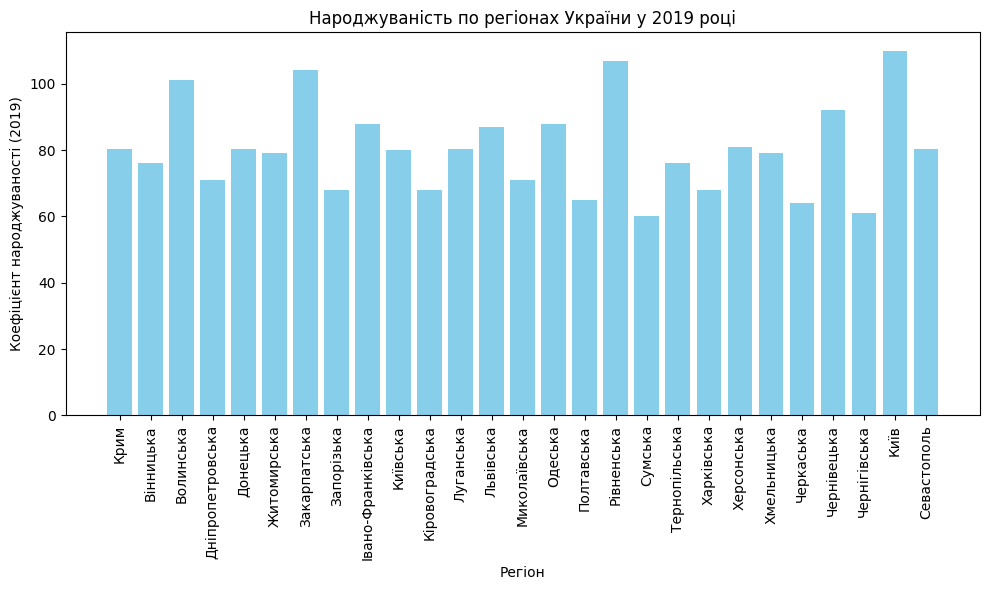

In [12]:
plt.figure(figsize=(10, 6))
plt.bar(df["Регіон"], df["2019"], color='skyblue')
plt.xticks(rotation=90)
plt.xlabel("Регіон")
plt.ylabel("Коефіцієнт народжуваності (2019)")
plt.title("Народжуваність по регіонах України у 2019 році")
plt.tight_layout()
plt.show()